# **Problem Statement: Predict whether income exceeds $50K/yr based on census data.**

https://archive.ics.uci.edu/ml/datasets/adult

Student Name: Pushkal Suri
Student ID: 100799314

In [1]:
##Importing necessary Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
#setting the logging level to INFO for the TensorFlow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

In [3]:
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" #Assigning the variable for Training Dataset
Path_Test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" #Assigning the variable for Test Dataset
#Assigning coloumn names
Columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']

In [4]:
df_train = pd.read_csv(Path,skipinitialspace=True,names=Columns,index_col=False) #Reading Training Data in pandas dataframe
df_test = pd.read_csv(Path_Test,skiprows=1,skipinitialspace=True,names=Columns,index_col=False)#Reading Test Data in pandas dataframe

In [5]:
#Checking Shape of the training and test dataframes
print(df_train.shape,df_test.shape)

(32561, 15) (16281, 15)


In [6]:
#Checking Data Types of all the variables in Training Dataset
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label             object
dtype: object

**Data Pre-Processing**

In [7]:
#Converting label column (Dependent) to Binary Class for Training and Test Data as 
#Tensorflow requires a Boolean value to train the classifier.
label = {'<=50K':0,'>50K':1}
df_train.label = [label[item] for item in df_train.label]
label_t = {'<=50K.': 0,'>50K.': 1}
df_test.label = [label_t[item] for item in df_test.label]

In [8]:
#Checking Label Count for Training and Test Data
print(df_train["label"].value_counts())
print(df_test["label"].value_counts())

0    24720
1     7841
Name: label, dtype: int64
0    12435
1     3846
Name: label, dtype: int64


In [9]:
#Veryfing Label Object type Coloumn converting to Column type Integer
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label              int64
dtype: object

In [10]:
##Add features to the bucket: 
###Define continuous list
continuous_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
### Define the categorical list
categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [11]:
#Converting all the variables from continuous_features into a tensor with a numeric value. 
continuous_features_1 = [tf.feature_column.numeric_column(k) for k in continuous_features] #each feauture in continuous_features will be created into numeric feature column which will further used in Tensorflow model

In [12]:
#Converting all object variable to a categorical column in TensorFlow model.
categorical_features_1 = [tf.feature_column.categorical_column_with_hash_bucket(k,hash_bucket_size=1000) for k in categorical_features] #Hash bucket technique is used to represent the categorical values as integers.

**Train the Classifier Model**

In [13]:
#importing feature column module to transforms raw input data into 
#a format that can be used as input to a TensorFlow model.
from tensorflow.python.feature_column import feature_column 
#model will compute the weights of the columns contained in continuous_features_1 and categorical_features_1.
model = tf.estimator.LinearClassifier(n_classes=2,model_dir="ongoing/train",feature_columns =categorical_features_1+continuous_features_1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ongoing/train', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
#Creating a function with the arguments required by the linear estimator, i.e., 
#number of epochs, number of batches and shuffle the dataset or not
Features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
Label = 'label'
def get_input_fn(data_set,num_epochs=None,n_batch=128,shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=pd.DataFrame({k:data_set[k].values for k in Features}),#defining x variables as a pandas data frame and looping over all the data stored in Features
        y = pd.Series(data_set[Label].values),
        batch_size=n_batch,
        num_epochs=num_epochs,
        shuffle=shuffle
    )

In [15]:
#Training the model useing the function defined above to feed the model with the appropriate values.
#Model will be trained over 1000 steps
model.train(input_fn=get_input_fn(df_train,num_epochs=None,n_batch=128,shuffle=False),steps=1000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ongoing/train/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 

In [16]:
#feeding the model with the test set and set the number of epochs to 1, i.e., the data will go to the model only one time
model.evaluate(input_fn=get_input_fn(df_test,num_epochs=1,n_batch=128,shuffle=False),steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-03-14T14:32:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Inference Time : 2.92700s
INFO:tensorflow:Finished evaluation at 2023-03-14-14:32:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7953443, accuracy_baseline = 0.76377374, auc = 0.5890391, auc_precision_recall = 0.39350957, average_loss = 192.11894, global_step = 1000, label/mean = 0.23622628, loss = 191.51414, precision = 0.75803214, prediction/mean = 0.061201867, recall = 0.19630785
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ongoing/train/model.ckpt-1000


{'accuracy': 0.7953443,
 'accuracy_baseline': 0.76377374,
 'auc': 0.5890391,
 'auc_precision_recall': 0.39350957,
 'average_loss': 192.11894,
 'label/mean': 0.23622628,
 'loss': 191.51414,
 'precision': 0.75803214,
 'prediction/mean': 0.061201867,
 'recall': 0.19630785,
 'global_step': 1000}

**Defination of all the performance Matrix:**

**accuracy:** This is the overall accuracy of the model, i.e., the proportion of correctly classified instances in the evaluation dataset.

**accuracy_baseline**: This is the accuracy of a baseline model that always predicts the most frequent class in the evaluation dataset. This metric helps in determining whether the model is performing better than the baseline or not.

**auc**: This is the Area Under the Receiver Operating Characteristic Curve (ROC AUC) metric, which is a measure of the model's ability to distinguish between positive and negative instances.

**auc_precision_recall**: This is the Area Under the Precision-Recall Curve metric, which is another measure of the model's ability to distinguish between positive and negative instances.

**average_loss**: This is the average loss incurred by the model on the evaluation dataset. The loss function is typically used to train the model and is a measure of how well the model is able to fit the training data.

**label/mean**: This is the proportion of positive instances in the evaluation dataset.

**loss**: This is the total loss incurred by the model on the evaluation dataset.

**precision**: This is the precision of the model, i.e., the proportion of correctly classified positive instances among all instances predicted as positive.

**prediction/mean**: This is the mean of the predicted values of the model on the evaluation dataset.

**recall**: This is the recall of the model, i.e., the proportion of correctly classified positive instances among all true positive instances in the evaluation dataset.

**global_step**: This is the number of training steps that the model has gone through. It is useful in determining how long the model has been trained and how stable the evaluation metrics are.

**accuracy:** This metric represents the fraction of correctly predicted labels out of all samples. In this case, the model achieved an accuracy of 0.795, meaning that it correctly predicted the label for 79.5% of the samples.

**accuracy_baseline:** This metric represents the accuracy of a "baseline" model that always predicts the majority class. In this case, the majority class has a label of 0. Therefore, the baseline accuracy would be the percentage of samples with label 0, which is 1 - 0.76377374 = 0.23622628. This means that the current model is performing better than the baseline model.

**auc:** This metric represents the Area Under the ROC Curve, which is a measure of the model's ability to discriminate between positive and negative classes. An AUC of 0.5 indicates that the model is no better than random, while an AUC of 1.0 indicates perfect discrimination. In this case, the model achieved an AUC of 0.589, indicating a relatively weak ability to distinguish between the two classes.

**auc_precision_recall:** This metric represents the area under the Precision-Recall Curve, which is another way to evaluate the model's ability to distinguish between the two classes. A higher AUCPR indicates a better ability to identify positive samples while maintaining a high precision. In this case, the model achieved an AUCPR of 0.394, which is relatively low.

**average_loss:** This metric represents the average value of the loss function over all samples. The loss function is a measure of how well the model's predictions match the true labels. In this case, the average loss is 192.119, which is relatively high.

**label/mean:** This metric represents the fraction of positive labels in the dataset. In this case, the fraction of positive labels is 0.23622628.

**loss:** This metric represents the total value of the loss function over all samples. In this case, the total loss is 191.514, which is slightly lower than the average loss.

**precision:** This metric represents the fraction of correctly predicted positive labels out of all predicted positive labels. In this case, the precision is 0.758, meaning that 75.8% of the samples predicted to be positive were actually positive.

**prediction/mean:** This metric represents the average predicted value for all samples. In this case, the average predicted value is 0.061, which is relatively low.

**recall:** This metric represents the fraction of correctly predicted positive labels out of all true positive labels. In this case, the recall is 0.196, meaning that the model correctly identified 19.6% of the positive samples.



**Making Confustion Matrix and Classification Report**

In [17]:
#Converting Labels to Array
labels_array = np.array(df_test.label)
labels_array

array([0, 0, 1, ..., 0, 0, 1])

In [18]:
#Calculating Predictions on test dataset
predictions = model.predict(input_fn=get_input_fn(df_test,num_epochs=1,n_batch=128,shuffle=False))
predicted_classes = [p["classes"] for p in predictions] #Contain all the "classes" values from each dictionary in predictions.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [19]:
#Converting labels_array & predicted_classes to Integer Data Type
labels_array = tf.cast(labels_array, tf.int64)
predicted_classes = tf.strings.to_number(predicted_classes, out_type=tf.int32)
predicted_classes_int64_array = tf.cast(predicted_classes, dtype=tf.int64)

In [20]:
#Initializing Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(
    labels=labels_array,
    predictions=predicted_classes,
    num_classes=2)

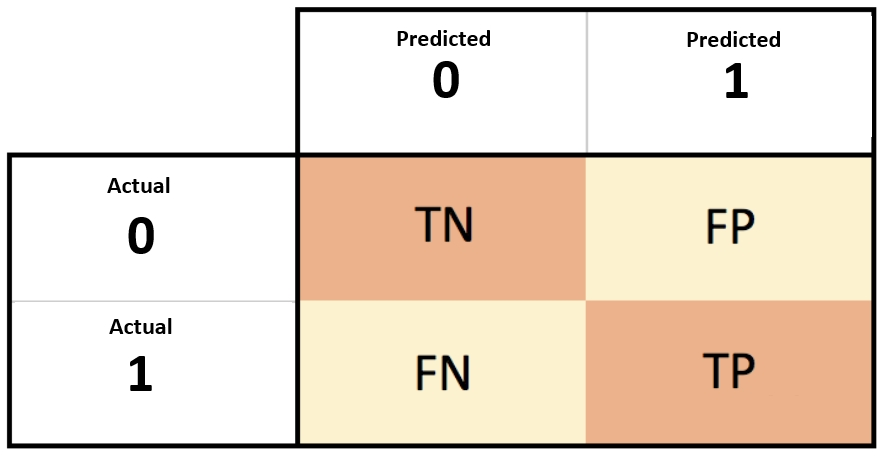

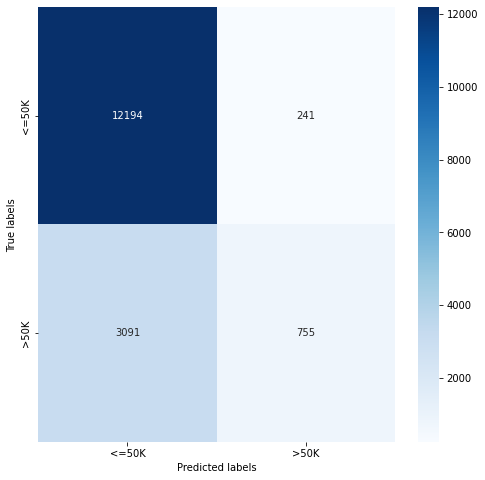

In [21]:
#Plotting Confusion Matrix
labels = ['<=50K', '>50K'] # replace with your class labels
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [22]:
#Making Classification Report
print(classification_report(
  labels_array, 
  predicted_classes, 
  target_names=label, 
  zero_division=0
))

              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88     12435
        >50K       0.76      0.20      0.31      3846

    accuracy                           0.80     16281
   macro avg       0.78      0.59      0.60     16281
weighted avg       0.79      0.80      0.75     16281





1.   **Precision** refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives)
2.   **Recall** is refers to the number of true positives divided by the total number of actual positive in the sample (i.e., the number of true positives plus the number of false negative).
3. **F1** score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.
4. **Specificity** predict a true negative of each category available.


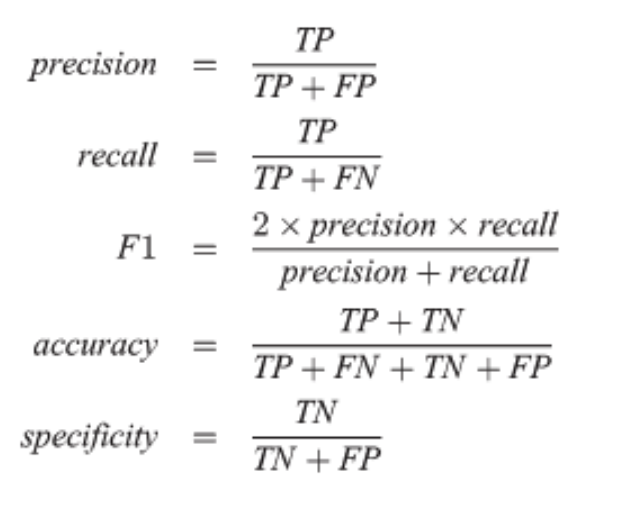

**Model Improvement**

In [23]:
#Making Function to add new variable in Train and Test Data Set.
#New Variable is Square of Age
def square_var(df_t, df_te, var_name = 'age'):
    df_t['new'] = df_t[var_name].pow(2) 
    df_te['new'] = df_te[var_name].pow(2) 
    return df_t, df_te

In [24]:
#Creating New Training and Test dataset having variable 'new' 
df_train_new, df_test_new = square_var(df_train, df_test, var_name = 'age')

In [25]:
#Checking the shape of new training and test dataset
print(df_train_new.shape, df_test_new.shape)			

(32561, 16) (16281, 16)


In [26]:
#Adding variable 'new' to the list of continuous features
CONTI_FEATURES_NEW  = ['age', 'fnlwgt','capital-gain', 'education-num', 'capital-loss', 'hours-per-week', 'new']
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]

In [27]:
# New model will compute the weights of the columns contained in continuous_features_new and categorical_features_1.
model_1 = tf.estimator.LinearClassifier(model_dir="ongoing/train1", feature_columns=categorical_features_1+ continuous_features_new)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ongoing/train1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
#Creating a function with the arguments required by the linear estimator, i.e., 
#number of epochs, number of batches and shuffle the dataset or not
FEATURES_NEW = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'new']
#Label = 'label'
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({k: data_set[k].values for k in FEATURES_NEW}),
       y = pd.Series(data_set[Label].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [29]:
#Training the new model useing the function defined above to feed the model with the appropriate values.
#Model will be trained over 1000 steps
model_1.train(input_fn=get_input_fn(df_train,num_epochs=None,n_batch=128,shuffle=False),steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ongoing/train1/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 142.274
INFO:tensorflow:loss = 606.06586, step = 100 (0.709 sec)
INFO:tensorflow:global_step/sec: 251.89
INFO:tensorflow:loss = 260.04898, step = 200 (0.394 sec)
INFO:tensorflow:global_step/sec: 218.957
INFO:tensorflow:loss = 838.8059, step = 300 (0.461 sec)
INFO:tensorflow:global_step/sec: 245.947
INFO:tensorflow:loss = 97.00019, step = 400 (0.401 sec)
INFO:tensorflow:global_step/sec: 231.355
INFO:tensorflow:loss = 119.83975, step = 500 (0.437 sec)
INFO:tensor

In [30]:
#feeding the new model with the test set and set the number of epochs to 1, i.e., the data will go to the model only one time
model_1.evaluate(input_fn=get_input_fn(df_test_new,num_epochs=1,n_batch = 128,shuffle=False),steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-03-14T14:33:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Inference Time : 1.81816s
INFO:tensorflow:Finished evaluation at 2023-03-14-14:33:05
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7932559, accuracy_baseline = 0.76377374, auc = 0.6111148, auc_precision_recall = 0.3999272, average_loss = 114.120926, global_step = 1000, label/mean = 0.23622628, loss = 113.88951, precision = 0.6546392, prediction/mean = 0.095264405, recall = 0.26417056
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ongoing/train1/model.ckpt-1000


{'accuracy': 0.7932559,
 'accuracy_baseline': 0.76377374,
 'auc': 0.6111148,
 'auc_precision_recall': 0.3999272,
 'average_loss': 114.120926,
 'label/mean': 0.23622628,
 'loss': 113.88951,
 'precision': 0.6546392,
 'prediction/mean': 0.095264405,
 'recall': 0.26417056,
 'global_step': 1000}

**Explanation of each of the metrics:**

**accuracy:** This represents the percentage of correctly 
classified instances in the test set. In this case, the accuracy is 79.32%.

**accuracy_baseline:** This represents the accuracy of a baseline model that always predicts the majority class. In this case, the majority class appears to be the negative class (label 0) and the accuracy baseline is 76.38%.

**auc:** This represents the Area Under the Receiver Operating Characteristic Curve (ROC AUC). It measures the performance of the model in distinguishing between the positive and negative classes. The AUC ranges from 0 to 1, with a higher value indicating better performance. In this case, the AUC is 0.61.

**auc_precision_recall:** This represents the area under the precision-recall curve. It measures the trade-off between precision and recall, and is particularly useful when the classes are imbalanced. In this case, the AUC precision-recall is 0.40.

**average_loss:** This represents the average loss per instance during training. The loss function measures how well the model is able to predict the correct label. In this case, the average loss is 114.12.

**label/mean:** This represents the proportion of positive labels in the test set. In this case, the proportion of positive labels is 23.62%.

**loss:** This represents the total loss over the entire test set. In this case, the total loss is 113.89.

**precision:** This represents the percentage of correctly predicted positive instances out of all instances predicted as positive. In this case, the precision is 65.46%.

**prediction/mean:** This represents the mean prediction of the model over the test set. In this case, the mean prediction is 0.095.

**recall:** This represents the percentage of correctly predicted positive instances out of all positive instances in the test set. In this case, the recall is 26.42%.

**global_step**: This represents the number of training steps performed during training. In this case, the model has been trained for 1000 steps.


In [31]:
#Converting Labels to Array in new test dataset
labels_array = np.array(df_test_new.label)
labels_array

array([0, 0, 1, ..., 0, 0, 1])

In [32]:
#Calculating Predictions on new test dataset
predictions_new = model_1.predict(input_fn=get_input_fn(df_test,num_epochs=1,n_batch=128,shuffle=False))
predicted_classes_new = [p["classes"] for p in predictions_new] #Contain all the "classes" values from each dictionary in predictions.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ongoing/train1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
#Converting labels_array & predicted_classes to Integer Data Type
labels_array_1 = tf.cast(labels_array, tf.int64)
predicted_classes_new = tf.strings.to_number(predicted_classes_new, out_type=tf.int32)
predicted_classes_new_int64_array = tf.cast(predicted_classes_new, dtype=tf.int64)

In [34]:
#Initializing Confusion Matrix
confusion_matrix_new = tf.math.confusion_matrix(
    labels=labels_array_1,
    predictions=predicted_classes_new,
    num_classes=2)

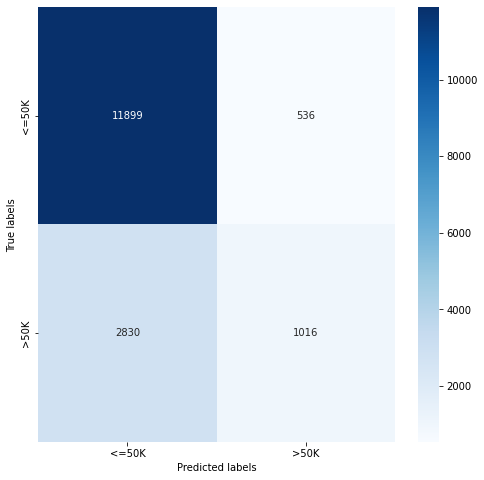

In [35]:
#Plotting Confusion Matrix
labels = ['<=50K', '>50K'] # replace with your class labels
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_new, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
#Making Classification Report
print(classification_report(
  labels_array_1, 
  predicted_classes_new, 
  target_names=label, 
  zero_division=0
))

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88     12435
        >50K       0.65      0.26      0.38      3846

    accuracy                           0.79     16281
   macro avg       0.73      0.61      0.63     16281
weighted avg       0.77      0.79      0.76     16281



Comparing the two models based on their performance metrics, below are the following conclusions:

**accuracy:** Both models have similar accuracy scores, with first model having a slightly higher accuracy of 0.795 compared to Model_1's accuracy of 0.793.

**auc:** Model 1 has a higher AUC score of 0.611 compared to first model's AUC of 0.589, indicating that Model 1 has better discrimination ability.

**auc_precision_recall:** Model 1 has a higher AUCPR score of 0.400 compared to first model's AUCPR of 0.394, indicating that Model 1 has a better ability to identify positive samples while maintaining a high precision.

**average_loss:** first model has a higher average loss score of 192.119 compared to Model 1's average loss of 114.121, indicating that first model has higher prediction errors.

**precision:** first model has a higher precision score of 0.758 compared to Model 1's precision of 0.655, indicating that first model has a better ability to correctly predict positive samples.

**recall:** Model 1 has a higher recall score of 0.264 compared to first model's recall of 0.196, indicating that Model 1 has a better ability to correctly identify positive samples.

Overall, it appears that Model 1 has better discrimination ability and recall, while first model has better precision. Additionally, Model 1 has lower prediction errors compared to first model. 